In [35]:
# Elite Database https://lichess.org/team/lichess-elite-database
# https://github.com/niklasf/python-chess
# Following the tutorial: https://www.youtube.com/watch?v=u2-ydOlWZU4&t=114s

In [2]:
import chess
from stockfish import Stockfish

# I am creating an intentionally worse stockfish engine 
# to estimate complexity of positions esp blunders / mistakes
# that a human might not see but a computer would!

stockfish_good = Stockfish("/Users/praneethkruthiventi/Desktop/stockfish/stockfish-macos-x86-64")
stockfish_good.set_depth(20) #How deep the AI looks
stockfish_good.set_skill_level(20) #Highest rank stockfish

#stockfish that thinks like praneeth 
stockfish_bad = Stockfish("/Users/praneethkruthiventi/Desktop/stockfish/stockfish-macos-x86-64")
stockfish_bad.set_depth(3)
stockfish_bad.set_skill_level(3)

In [3]:
import chess.pgn
import pandas as pd
pd.options.display.max_columns=999
import datetime
import tqdm
import zipfile

## Creating a DataFrame of all the game I am going to analyse.

In [5]:
NUM_GAMES=366392
rows=[]
with open(f'lichess_elite_2024-08.pgn') as pgn:
    for game in tqdm.tqdm(range(NUM_GAMES)):
        row={}
        game = chess.pgn.read_game(pgn)
        row['headers']=game.headers.__dict__
        row['moves']=[x.uci() for x in game.mainline_moves()]
        rows.append(row)

 75%|█████████████████████████▎        | 273032/366392 [09:08<03:07, 497.71it/s]


AttributeError: 'NoneType' object has no attribute 'headers'

In [6]:
games = pd.DataFrame(rows)
games

,headers,moves
0,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f..."
1,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e6, d2d4, c7c5, g1f3, c5d4, f3d4, g8f..."
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, g8f..."
3,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, g1f3, e7e6, c2c3, d7d5, c1f4, c7c..."
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, e7e6, g2g3, b7b6, f1g2, c8b..."
...,...,...
273027,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, b8c6, g1f3, d7d5, e4d5, d8d5, b1c3, d5a..."
273028,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, c2c4, e7e6, b1c3, g8f6, c4d5, e6d..."
273029,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f..."
273030,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, b8c6, c2c3, d7d5, e4d5, d8d..."


In [7]:
# Save as CSV for easy, faster access in the future
games.to_csv("loaded_games_2024-08.csv", index=False)

In [8]:
games

,headers,moves
0,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f..."
1,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e6, d2d4, c7c5, g1f3, c5d4, f3d4, g8f..."
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, g8f..."
3,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, g1f3, e7e6, c2c3, d7d5, c1f4, c7c..."
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, e7e6, g2g3, b7b6, f1g2, c8b..."
...,...,...
273027,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, b8c6, g1f3, d7d5, e4d5, d8d5, b1c3, d5a..."
273028,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, c2c4, e7e6, b1c3, g8f6, c4d5, e6d..."
273029,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f..."
273030,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, b8c6, c2c3, d7d5, e4d5, d8d..."


In [9]:
#Convert moves from string into list of move strings 

#Try not to run eval unless you really need to and are sure the text comes from a trusted source
games['moves']=games['moves'].apply(lambda x: eval(x))
games['headers']=games['headers'].apply(lambda x: eval(x))#to dict

TypeError: eval() arg 1 must be a string, bytes or code object

In [10]:
game=games.iloc[0]
game['headers']

{'_tag_roster': {'Event': 'Rated Blitz game',
  'Site': '?',
  'Date': '2024.08.01',
  'Round': '-',
  'White': 'Carcelario85',
  'Black': 'NorthernHawk',
  'Result': '0-1'},
 '_others': {'LichessURL': 'https://lichess.org/nQ9HUk7a',
  'BlackTitle': 'FM',
  'WhiteElo': '2521',
  'BlackElo': '2496',
  'ECO': 'C78',
  'Opening': 'Ruy Lopez: Morphy Defense, Neo-Arkhangelsk Variation',
  'TimeControl': '180+2',
  'UTCDate': '2024.08.01',
  'UTCTime': '00:00:02',
  'Termination': 'Normal',
  'WhiteRatingDiff': '-6',
  'BlackRatingDiff': '+6'}}

In [11]:
games['lichess_id']=games['headers'].apply(lambda x: x.get("_others",{}).get("LichessURL","").split("/")[-1])
games['ECO']=games['headers'].apply(lambda x: x.get("_others",{}).get("ECO"))
games['white_elo']=games['headers'].apply(lambda x: x.get("_others",{}).get("WhiteElo","").split("-")[0]).astype(int)
games['black_elo']=games['headers'].apply(lambda x: x.get("_others",{}).get("BlackElo","").split("-")[0]).astype(int)
games['opening_name']=games['headers'].apply(lambda x: x.get("_others",{}).get("Opening",""))

games['white_score']=games['headers'].apply(lambda x: x.get("_tag_roster",{}).get("Result","").split("-")[0].replace("1/2",".5")).astype(float)
games

,headers,moves,lichess_id,ECO,white_elo,black_elo,opening_name,white_score
0,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f...",nQ9HUk7a,C78,2521,2496,"Ruy Lopez: Morphy Defense, Neo-Arkhangelsk Var...",0.0
1,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e6, d2d4, c7c5, g1f3, c5d4, f3d4, g8f...",pdAmDDfM,B40,2396,2563,Sicilian Defense: Four Knights Variation,0.0
2,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, d7d6, d2d4, c5d4, d1d4, g8f...",gS6PnK99,B53,2576,2694,Sicilian Defense: Chekhover Variation,1.0
3,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, g8f6, g1f3, e7e6, c2c3, d7d5, c1f4, c7c...",RrQuZDRE,A46,2737,2637,Indian Defense: Knights Variation,1.0
4,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, e7e6, g2g3, b7b6, f1g2, c8b...",gVmhXx9b,B40,2563,2606,Sicilian Defense: French Variation,0.0
...,...,...,...,...,...,...,...,...
273027,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, b8c6, g1f3, d7d5, e4d5, d8d5, b1c3, d5a...",iR7fhvuv,B00,2535,2454,Nimzowitsch Defense: Declined Variation,0.0
273028,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[d2d4, d7d5, c2c4, e7e6, b1c3, g8f6, c4d5, e6d...",I0yHWnBs,D35,3002,3035,"Queen's Gambit Declined: Exchange Variation, P...",0.5
273029,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, e7e5, g1f3, b8c6, f1b5, a7a6, b5a4, g8f...",Jz0nxp1L,C79,2642,2467,"Ruy Lopez: Morphy Defense, Steinitz Deferred",1.0
273030,"{'_tag_roster': {'Event': 'Rated Blitz game', ...","[e2e4, c7c5, g1f3, b8c6, c2c3, d7d5, e4d5, d8d...",ppXmjXzx,B30,2681,2668,Sicilian Defense: Old Sicilian,1.0


In [14]:
#If you get an error on this import be sure to run pip install ftfy==6.1.1. This was added to requirements.txt recently
import ftfy
ftfy.fix_encoding("GrÃ¼nfeld Defense: Exchange Variation")

'Grünfeld Defense: Exchange Variation'

In [15]:
#pip install ftfy

In [16]:
games['opening_name']=games['opening_name'].apply(ftfy.fix_encoding)
games['opening_name']

0         Ruy Lopez: Morphy Defense, Neo-Arkhangelsk Var...
1                  Sicilian Defense: Four Knights Variation
2                     Sicilian Defense: Chekhover Variation
3                         Indian Defense: Knights Variation
4                        Sicilian Defense: French Variation
                                ...                        
273027              Nimzowitsch Defense: Declined Variation
273028    Queen's Gambit Declined: Exchange Variation, P...
273029         Ruy Lopez: Morphy Defense, Steinitz Deferred
273030                       Sicilian Defense: Old Sicilian
273031    Grünfeld Defense: Exchange Variation, Modern E...
Name: opening_name, Length: 273032, dtype: object

In [17]:
#Ensure score parsed correctly
games['white_score'].value_counts()

1.0    127178
0.0    112464
0.5     33390
Name: white_score, dtype: int64

In [18]:
# Analysis

In [19]:
import scipy.stats as stats
games['white_elo_advantage']=games['white_elo']-games['black_elo']

#A quick google suggests point-biserial correlation is better than pd.DataFrame.corr but I found the same results both ways. 
#Pandas does not return p-value so we will use scipy.stats
stats.pointbiserialr(games['white_elo_advantage'], games['white_score'])

PointbiserialrResult(correlation=0.2957388206992733, pvalue=0.0)

In [20]:
#Standard point values for different pieces. Lowercase is white piece and uppercase is black
piece_scores={
    "p": 1,
    "P": -1,
    "r": 5,
    "R": -5,
    "n": 3,
    "N": -3,
    "b": 3,
    "B": -3,
    "q": 9,
    "Q": -9
}

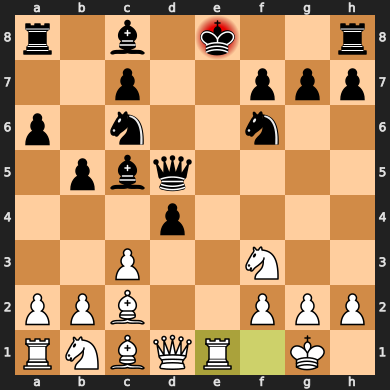

In [22]:
#Play a game up to move number

move_number=19
row={}
row['taken']=[]
board=chess.Board()
for san in game['moves'][:move_number]:
    parsed_san=board.parse_san(san)#move by the san "Standard Algebraic Notation"
    taken=board.piece_at(parsed_san.to_square)
    if taken:
        row['taken'].append(taken.__str__())
    move=board.push_san(san)
board

In [23]:
import random

#Used by chessnit.com
def build_stored_game_analysis(game, move_number):
    row={}
    row['move_number']=move_number
    row['taken']=[]
    board=chess.Board()
    for san in game['moves'][:move_number]:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            row['taken'].append(taken.__str__())
        move=board.push_san(san)
    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    row['url']=game['headers'].get("_others",{}).get("LichessURL","")+f"#{move_number}"
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row
row=build_stored_game_analysis(game, 20)
row

{'move_number': 20,
 'taken': ['p', 'P', 'P'],
 'invalid': False,
 'evaluation': 2,
 'taken_score': -100,
 'fen': 'r3k2r/2p2ppp/p1n1bn2/1pbq4/3p4/2P2N2/PPB2PPP/RNBQR1K1 w kq - 2 11',
 'url': 'https://lichess.org/nQ9HUk7a#20',
 'last_move': 'c8e6'}

In [24]:
rows=[]
for move_number in tqdm.tqdm(range(1,20+1)):
    rows.append(build_stored_game_analysis(game, move_number))
moves=pd.DataFrame(rows).set_index("move_number")
moves

100%|███████████████████████████████████████████| 20/20 [00:35<00:00,  1.79s/it]


,taken,invalid,evaluation,taken_score,fen,url,last_move
move_number,,,,,,,
1,[],False,29,0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,https://lichess.org/nQ9HUk7a#1,e2e4
2,[],False,28,0,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,https://lichess.org/nQ9HUk7a#2,e7e5
3,[],False,33,0,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,https://lichess.org/nQ9HUk7a#3,g1f3
4,[],False,29,0,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,https://lichess.org/nQ9HUk7a#4,b8c6
5,[],False,36,0,r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/5N2/PPPP1PPP/R...,https://lichess.org/nQ9HUk7a#5,f1b5
6,[],False,36,0,r1bqkbnr/1ppp1ppp/p1n5/1B2p3/4P3/5N2/PPPP1PPP/...,https://lichess.org/nQ9HUk7a#6,a7a6
7,[],False,33,0,r1bqkbnr/1ppp1ppp/p1n5/4p3/B3P3/5N2/PPPP1PPP/R...,https://lichess.org/nQ9HUk7a#7,b5a4
8,[],False,39,0,r1bqkb1r/1ppp1ppp/p1n2n2/4p3/B3P3/5N2/PPPP1PPP...,https://lichess.org/nQ9HUk7a#8,g8f6
9,[],False,36,0,r1bqkb1r/1ppp1ppp/p1n2n2/4p3/B3P3/5N2/PPPP1PPP...,https://lichess.org/nQ9HUk7a#9,e1g1


<AxesSubplot:xlabel='move_number'>

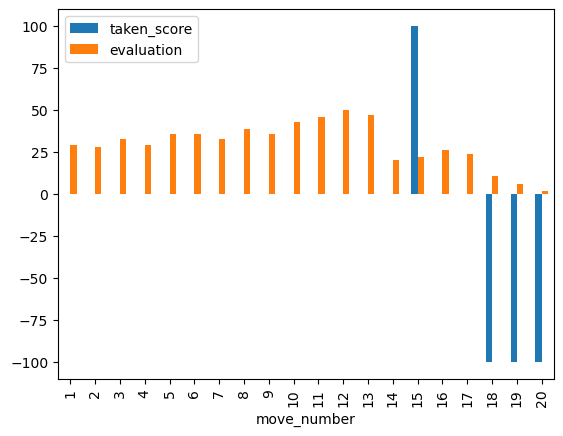

In [25]:
moves[['taken_score','evaluation']].plot(kind="bar")

In [26]:
def play_board(moves):
    #Adding this function to make investigating easier
    taken_pieces=[]
    board=chess.Board()
    for san in moves:
        parsed_san=board.parse_san(san)
        taken=board.piece_at(parsed_san.to_square)
        if taken:
            taken_pieces.append(taken.__str__())
        move=board.push_san(san)
    return board,taken_pieces

def build_stored_game_analysis_smart_dumb(game, move_number):
    row={}
    row['move_number']=move_number
    board,row['taken']=play_board(game['moves'][:move_number])

    row['invalid']=bool(board.promoted) or bool(board.outcome())
    stockfish_good.set_fen_position(board.fen())
    evaluation=stockfish_good.get_evaluation()
    row['smart_evaluation']=evaluation['value']
    
    stockfish_bad.set_fen_position(board.fen())
    evaluation=stockfish_bad.get_evaluation()
    row['dumb_evaluation']=evaluation['value']
    
    
    row['taken_score']=sum([piece_scores.get(p) for p in row['taken']])*100
    row['fen']=board.fen()
    row['url']=game['headers'].get("_others",{}).get("LichessURL","")+f"#{move_number}"
    try:
        row['last_move']=san
    except:
        print(game)
        row['invalid']=True
    return row
row=build_stored_game_analysis_smart_dumb(game, 20)
row

{'move_number': 20,
 'taken': ['p', 'P', 'P'],
 'invalid': False,
 'smart_evaluation': 2,
 'dumb_evaluation': -13,
 'taken_score': -100,
 'fen': 'r3k2r/2p2ppp/p1n1bn2/1pbq4/3p4/2P2N2/PPB2PPP/RNBQR1K1 w kq - 2 11',
 'url': 'https://lichess.org/nQ9HUk7a#20',
 'last_move': 'f1e1'}

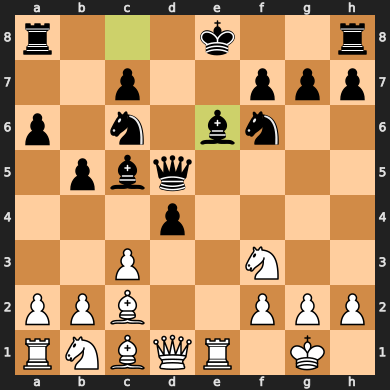

In [27]:
play_board(game['moves'][:20])[0]

In [28]:
rows=[]
for move_number in tqdm.tqdm(range(1,30+1)):
    if move_number>len(game['moves']):
        break
    rows.append(build_stored_game_analysis_smart_dumb(game, move_number))
moves=pd.DataFrame(rows).set_index("move_number")
moves

100%|███████████████████████████████████████████| 30/30 [00:53<00:00,  1.78s/it]


,taken,invalid,smart_evaluation,dumb_evaluation,taken_score,fen,url,last_move
move_number,,,,,,,,
1,[],False,29,17,0,rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR ...,https://lichess.org/nQ9HUk7a#1,f1e1
2,[],False,28,38,0,rnbqkbnr/pppp1ppp/8/4p3/4P3/8/PPPP1PPP/RNBQKBN...,https://lichess.org/nQ9HUk7a#2,f1e1
3,[],False,33,26,0,rnbqkbnr/pppp1ppp/8/4p3/4P3/5N2/PPPP1PPP/RNBQK...,https://lichess.org/nQ9HUk7a#3,f1e1
4,[],False,29,35,0,r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNB...,https://lichess.org/nQ9HUk7a#4,f1e1
5,[],False,36,5,0,r1bqkbnr/pppp1ppp/2n5/1B2p3/4P3/5N2/PPPP1PPP/R...,https://lichess.org/nQ9HUk7a#5,f1e1
6,[],False,36,78,0,r1bqkbnr/1ppp1ppp/p1n5/1B2p3/4P3/5N2/PPPP1PPP/...,https://lichess.org/nQ9HUk7a#6,f1e1
7,[],False,33,6,0,r1bqkbnr/1ppp1ppp/p1n5/4p3/B3P3/5N2/PPPP1PPP/R...,https://lichess.org/nQ9HUk7a#7,f1e1
8,[],False,39,22,0,r1bqkb1r/1ppp1ppp/p1n2n2/4p3/B3P3/5N2/PPPP1PPP...,https://lichess.org/nQ9HUk7a#8,f1e1
9,[],False,36,0,0,r1bqkb1r/1ppp1ppp/p1n2n2/4p3/B3P3/5N2/PPPP1PPP...,https://lichess.org/nQ9HUk7a#9,f1e1


<AxesSubplot:xlabel='move_number'>

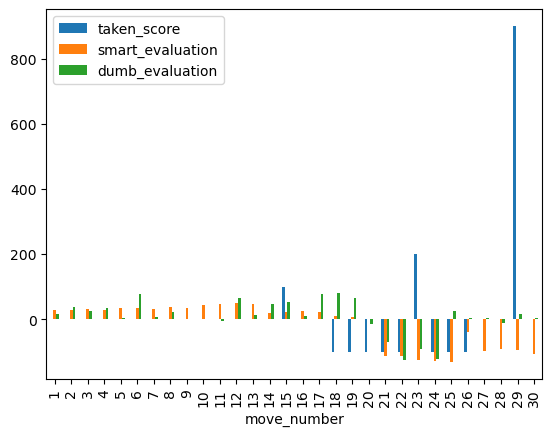

In [29]:
moves[['taken_score','smart_evaluation','dumb_evaluation']].plot(kind="bar")

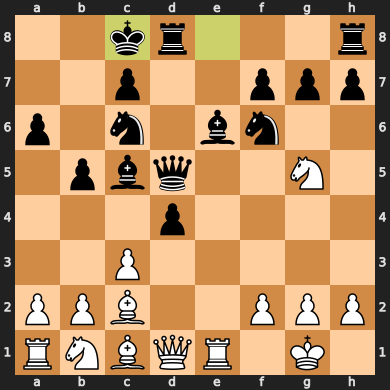

In [31]:
play_board(game['moves'][:22])[0]


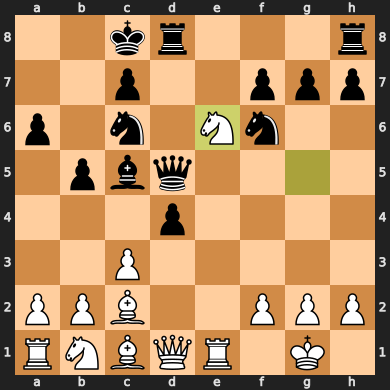

In [32]:
play_board(game['moves'][:23])[0]


In [33]:
board,taken=play_board(game['moves'][:24])

stockfish_bad.set_fen_position(board.fen())
evaluation=stockfish_bad.get_evaluation()
evaluation,stockfish_bad.get_best_move()

({'type': 'cp', 'value': -123}, 'c2b3')

In [34]:
stockfish_bad.get_top_moves()#can be used to create an AI


[{'Move': 'c2b3', 'Centipawn': -43, 'Mate': None},
 {'Move': 'a2a4', 'Centipawn': -95, 'Mate': None},
 {'Move': 'b2b4', 'Centipawn': -145, 'Mate': None},
 {'Move': 'b1d2', 'Centipawn': -155, 'Mate': None},
 {'Move': 'h2h3', 'Centipawn': -185, 'Mate': None}]